# Danh sách sinh viên:
## 52100413 _ Nguyễn Thái Hòa
## 52100697 _ Phan Thị Thùy Linh
## 52100489 _ Trần Thị Anh Thư

# FFNN

In [1]:
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

#For model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Chuẩn hóa dữ liệu

In [3]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [4]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [5]:
sc = StandardScaler()
le = LabelEncoder()

In [6]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [7]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


# Feature Selection

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


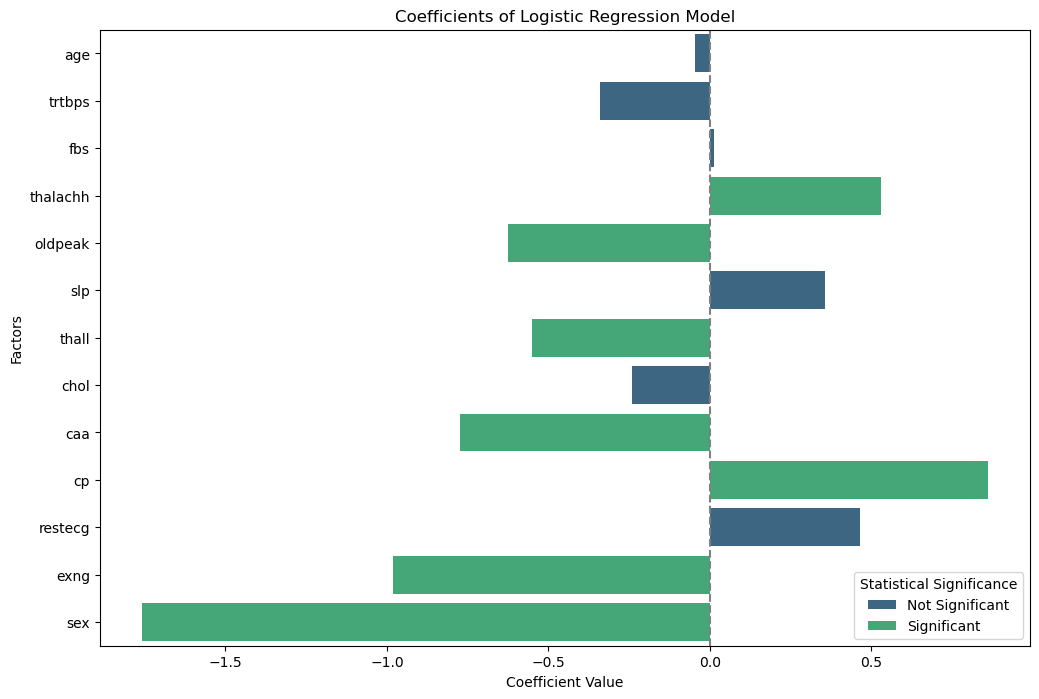

,Factors,Coefficients,P-Values,Significance
0,age,-0.044506,0.832266,Not Significant
1,trtbps,-0.341020,0.059582,Not Significant
2,fbs,0.012406,0.947464,Not Significant
3,thalachh,0.530772,0.026485,Significant
4,oldpeak,-0.626263,0.011523,Significant
5,slp,0.356383,0.097717,Not Significant
6,thall,-0.550403,0.001910,Significant
7,chol,-0.239592,0.220873,Not Significant
8,caa,-0.773349,0.000051,Significant
9,cp,0.859851,0.000004,Significant


In [8]:
X = df_final.drop("output",axis = 1)
y = df_final.output

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Building the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Extracting coefficients and p-values
coefficients = result.params[1:]  # Excluding the intercept
p_values = result.pvalues[1:]  # Excluding the intercept for p-values

# Creating a dataframe for visualization
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Adding a column for the significance of coefficients
viz_df['Significance'] = np.where(viz_df['P-Values'] <= 0.05, 'Significant', 'Not Significant')

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Statistical Significance', loc='lower right')

plt.show()

viz_df

In [9]:
# Filter significant features based on p-values
significant_features = viz_df[viz_df['Significance'] == 'Significant']['Factors'].tolist()

# Keep only significant features in the DataFrame X
X_filtered = X[significant_features]

# Display the DataFrame with only significant features
print(X_filtered.head())


   thalachh   oldpeak     thall  caa  cp  exng  sex
0  0.015443  1.087338 -2.148873    0   3     0    1
1  1.633471  2.122573 -0.512922    0   2     0    1
2  0.977514  0.310912 -0.512922    0   1     0    0
3  1.239897 -0.206705 -0.512922    0   1     0    1
4  0.583939 -0.379244 -0.512922    0   0     1    0


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y,test_size=0.3,random_state=142, stratify=y)

# Phương Pháp Oversampling hoặc Undersampling:

In [11]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


# Áp dụng early stop và L1 Regularization (VotingClassifier)

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier


# Create a simple FFNN model function
def create_ffnn_model():
    model = Sequential()
    
    # Tầng ẩn 1
    model.add(Dense(128, input_dim=7, activation='relu'))
    
    # Tầng ẩn 2
    model.add(Dense(64, activation='relu'))
    
    # Tầng ẩn 3
    model.add(Dense(32, activation='relu'))
    
    # Tầng ẩn 4
    model.add(Dense(16, activation='relu'))
    
    # Tầng đầu ra
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Wrap the Keras model using KerasClassifier
ffnn_model = KerasClassifier(build_fn=create_ffnn_model, epochs=30, batch_size=16, verbose=0)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=142)

# Create a VotingClassifier with Random Forest and FFNN models
ensemble_model = VotingClassifier(estimators=[('random_forest', rf_model), ('ffnn', ffnn_model)], voting='soft')

# Fit the ensemble model on the training data
history_ensemble = ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)
# Print the performance metrics
print("Ensemble Model Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

C:\Users\nguye\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)






Ensemble Model Accuracy: 81.32%
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# RNN with Ensemble (Voting)

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report, accuracy_score
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [14]:
# Xây dựng mô hình RNN
def create_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=regularizers.l1(1e-6)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [15]:
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=90, batch_size=32, verbose=0)
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=142)

In [16]:
# Create a VotingRegressor with Random Forest and RNN models
ensemble_model = VotingClassifier(estimators=[('random_forest', rf_model), ('rnn', rnn_model)])

# Fit the ensemble model on the training data
history_ensemble = ensemble_model.fit(X_train, y_train)

C:\Users\nguye\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [17]:
# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Print the performance metrics
print("Ensemble Model Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

Ensemble Model Accuracy: 79.12%
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

